In [1]:
import sys
sys.path.append('/home/fenglab/Desktop/transdiff_GRN/src/')

from find_modules import *
from topology import *

In [2]:
random_s = 11
random.seed(random_s)

In [3]:
with open('./../../data/GSE208199/QuickGO-annotations-TFs-mus.tsv', 'r') as f:
    lines = f.readlines()
tfs = [line.split('\t')[2] for line in lines[1:]]

with open('./../../data/GSE208199/grn_expression_t5.txt', 'r') as f:
    lines = f.readlines()
genes = [line.split('\t')[0] for line in lines[1:]]

grntfs = list(set(tfs)&set(genes))

In [4]:
dfexp = pd.read_csv('./../../data/GSE208199/matrix.csv').set_index('geneid')
dfexp = np.log2(dfexp+1)
dfexp = dfexp.loc[~dfexp.index.duplicated(keep='first'), :]
dfexp = dfexp[['Ascl1_ESC_1', 'Ascl1_ESC_2', 'Ascl1_D2_1', 'Ascl1_D2_2',
    'Ascl1_D3_GFPpos_1', 'Ascl1_D3_GFPpos_2','Ascl1_D4_GFPpos_1', 'Ascl1_D4_GFPpos_2',
    'Ascl1_D6_GFPpos_1','Ascl1_D6_GFPpos_2',
    'Ascl1_ESC_1', 'Ascl1_ESC_2', 'Ascl1_D2_1', 'Ascl1_D2_2',
    'Ascl1_D3_GFPneg_1','Ascl1_D3_GFPneg_2','Ascl1_D4_GFPneg_1', 'Ascl1_D4_GFPneg_2',
    'Ascl1_D6_GFPneg_1', 'Ascl1_D6_GFPneg_2',
    'Ngn2_ESC_1', 'Ngn2_ESC_2', 'Ngn2_D2_combi_1', 'Ngn2_D2_combi_2',
    'Ngn2_D3_GFPpos_1', 'Ngn2_D3_GFPpos_2','Ngn2_D4_GFPpos_1', 'Ngn2_D4_GFPpos_2',
    'Ngn2_D6_GFPpos_2', 'Ngn2_D6_GFPneg_1',
    'Ngn2_ESC_1', 'Ngn2_ESC_2', 'Ngn2_D2_combi_1', 'Ngn2_D2_combi_2',
    'Ngn2_D3_GFPneg_1','Ngn2_D3_GFPneg_2', 'Ngn2_D4_GFPneg_1', 'Ngn2_D4_GFPneg_2',
    'Ngn2_D6_GFPneg_1', 'Ngn2_D6_GFPneg_2']]

In [24]:
treatments = ['Ascl1p', 'Ascl1n', 'Ngn2p', 'Ngn2n']

def go_plot(community_no):
    '''gene ontology bar plot for one community'''
    dfannots = pd.read_csv(f'./../../results/temp/{str(community_no)}.csv')
    if len(dfannots.T)>1:
        dfannots['refgs'] = [int(n.split('/')[0]) for n in dfannots['BgRatio']]
        dfannots = dfannots[(dfannots['refgs']<1500)&(dfannots['refgs']>10)]
        dfannots = dfannots.drop_duplicates(subset='geneID', keep='first')
        dfannots = dfannots[:10]
        dfannots = dfannots.sort_values(by=['p.adjust'], ascending=False)
        if len(dfannots)>=1:
            if len(dfannots)>1:
                fig = plt.figure(figsize=(1.3, 1.5*np.log(len(dfannots))))
            else:
                fig = plt.figure(figsize=(1.3, 0.4))
            ax = fig.add_subplot(1, 1, 1)
            
            # abbreviations
            ylabels = [yl.replace('projection', 'proj.') for yl in list(dfannots['Description'])]
            ylabels = [yl.replace('regulation', 'reg.') for yl in ylabels]
            ylabels = [yl.replace('differentiation', 'differ.') for yl in ylabels]
            ylabels = [yl.replace('organization', 'org.') for yl in ylabels]
            ylabels = [yl.replace('morphogenesis', 'morpho.') for yl in ylabels]
            ylabels = [yl.replace('development ', 'devel. ') for yl in ylabels]
            
            plt.barh(ylabels, -np.log10(dfannots['p.adjust']), 
                    color=colors[community_no], alpha=0.2, edgecolor=colors[community_no], linewidth=2)
            plt.barh(ylabels, -np.log10(dfannots['p.adjust']), 
                    color='none', alpha=0.7, edgecolor=colors[community_no], linewidth=2)
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)
            plt.title(str(community_no), fontsize=15)
            plt.xlabel('-log'+r'$_{10}$'+'(FDR)', fontsize=15)
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
    return

def go_group_plot(community_no):
    '''gene ontology bar plot for all communities, input as list'''
    fig = plt.figure(figsize=(1.3, 5.5))
    ax = fig.add_subplot(1, 1, 1)
    bary=0
    ylab=[]
    for n in community_no:
        df = pd.read_csv(f'./../../results/temp/{str(n)}.csv')
        if len(df.T)>1:
            df['refgs'] = [int(n.split('/')[0]) for n in df['BgRatio']]
            df = df[(df['refgs']<1500)&(df['refgs']>10)]
            df = df.drop_duplicates(subset='geneID', keep='first')
            df = df[:3]
            df = df.sort_values(by=['p.adjust'], ascending=True)
            
            # abbreviations
            ylabels = [yl.replace('projection', 'proj.') for yl in list(df['Description'])]
            ylabels = [yl.replace('regulation', 'reg.') for yl in ylabels]
            ylabels = [yl.replace('differentiation', 'differ.') for yl in ylabels]
            ylabels = [yl.replace('organization', 'org.') for yl in ylabels]
            ylabels = [yl.replace('morphogenesis', 'morpho.') for yl in ylabels]
            
            plt.barh(np.arange(bary,bary+len(ylabels)), -np.log10(df['p.adjust']), 
                    color=colors[n], alpha=0.2, edgecolor=colors[n], linewidth=2)
            plt.barh(np.arange(bary,bary+len(ylabels)), -np.log10(df['p.adjust']), 
                    color='none', alpha=0.7, edgecolor=colors[n], linewidth=2)
            bary += len(ylabels)
            ylab += ylabels
            
    plt.gca().invert_yaxis()
    plt.xticks(fontsize=15)
    plt.yticks(np.arange(bary),ylab,fontsize=15)
    plt.xlabel('-log'+r'$_{10}$'+'(FDR)', fontsize=15)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    return

In [6]:
DG = read_directed_grn(f'./../../results/GSE208199/GRN/{treatments[0]}_1_t5.txt')
DGp = remove_edge(DG, 0.4, component='positive')
print(f'edges {len(DGp.edges())}')
print(f'nodes {len(DGp.nodes())}')
print(f'''mean weight {np.sum([w for _, _, w in list(DGp.edges.data('weight'))])/len(DGp.edges())}''')
print(f'mean degree {np.sum(list(dict(DGp.degree()).values()))/len(DGp.nodes())}')

edges 2412
nodes 521
mean weight 0.4807685776033153
mean degree 9.259117082533589


Text(0, 0.5, 'P(Degree)')

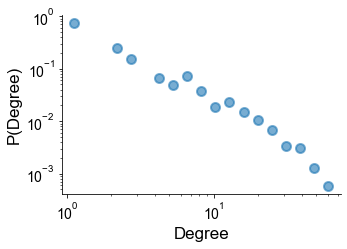

In [6]:
x1, y1 = plot_degree(DGp, n_bins=20)
fig = plt.figure(figsize=(5,3.3))
ax = fig.add_subplot(1, 1, 1)
ax.loglog(x1,y1, 'o', markersize=9, markeredgecolor='tab:blue', markeredgewidth=2, alpha=0.6)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Degree', fontsize=17)
plt.ylabel('P(Degree)', fontsize=17)
# plt.savefig('./../figs/S5A.svg', pad_inches=0.1, bbox_inches='tight')

In [7]:
part = louvain_cluster(DGp, random_state=True, random_s=random_s)
clustergo(part, lib='org.Mm.eg.db')

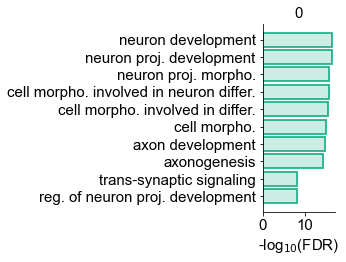

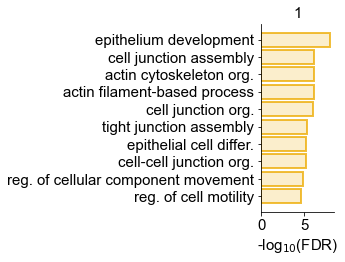

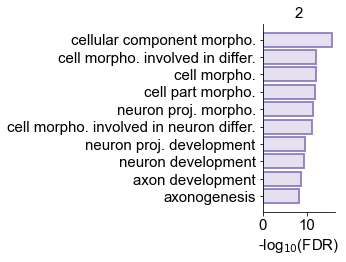

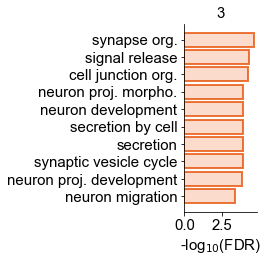

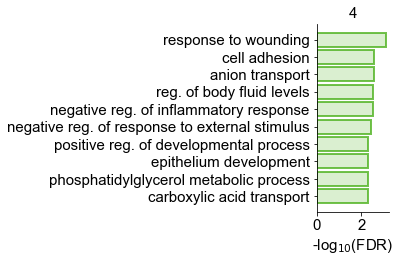

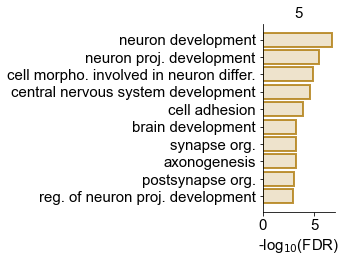

In [8]:
for n in np.unique(list(part.values())):
    go_plot(n)
#     plt.savefig(f'./../../figs/S5B_{n}.svg', pad_inches=0.1, bbox_inches='tight')

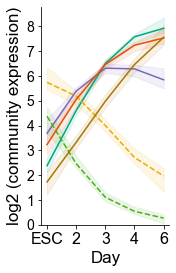

In [69]:
dfmem = pd.DataFrame(part, index=['Community']).T
fig = plt.figure(figsize=((2.3,4)))
ax = fig.add_subplot(1,1,1)
cmap = get_cmap(part, highlight=True, modulelist=list(np.arange(6)), alpha=0.8)
eval_x = np.arange(1.0,6.0)

for n in list(np.arange(6)):
    xs = np.repeat(np.array([np.repeat(np.arange(1.0,6.0),2)]),len(dfmem[dfmem['Community']==n]),axis=0)
    ys = dfexp.loc[dfmem[dfmem['Community']==n].index].to_numpy()[:,:10]
    smoothed, bottom, top = lowess_with_confidence_bounds(
        xs.flatten(), ys.flatten(), eval_x, lowess_kw={"frac": 0.8, "return_sorted":False})
    if n in [1,4]:
        plt.plot(eval_x,smoothed, color=cmap[n],ls='--')
    else:
        plt.plot(eval_x,smoothed, color=cmap[n])
    plt.fill_between(eval_x, bottom, top, color=cmap[n], alpha=0.1)

plt.ylim(bottom=0)
plt.xlabel('Day', fontsize=17)
plt.ylabel('log2 (community expression)', fontsize=17)
plt.xticks([1,2,3,4,5], ['ESC','2','3','4','6'], fontsize=16)
plt.yticks(fontsize=14)
# plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.savefig('./../../figs/S5B_exp.svg', pad_inches=0.1, bbox_inches='tight')

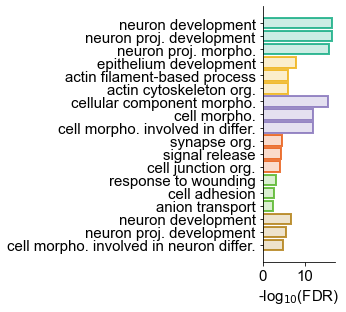

In [11]:
go_group_plot(list(np.arange(6)))
# plt.savefig('./../../figs/S5B_exp_go.svg', pad_inches=0.1, bbox_inches='tight')

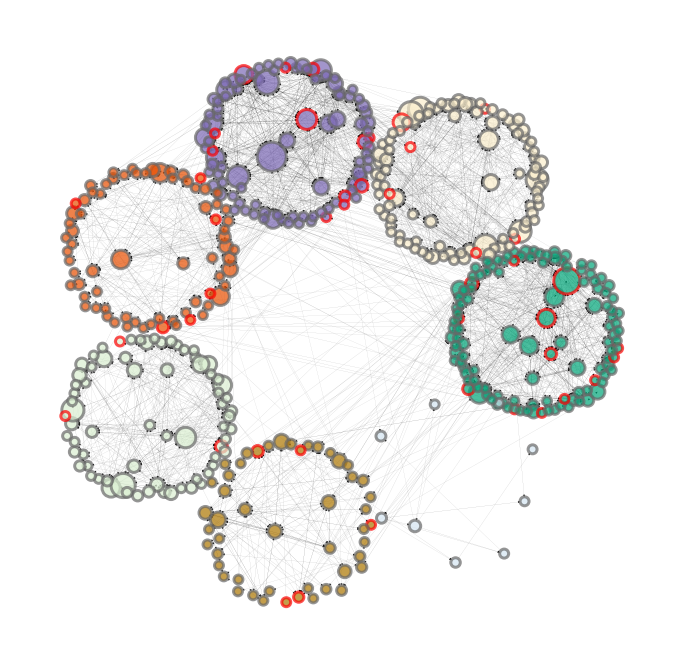

In [12]:
pos = community_layout(DGp, partition=part, scales_c=2.4, scales_n=1.8)
fig, ax = plt.subplots(figsize=(12, 12))
edge_colors = highlight_cmap(list(DGp.nodes()),grntfs)

node_size = np.array(list(nx.betweenness_centrality(DGp, weight='weight', seed=random_s).values()))*8000+80
edge_width = np.array(list(nx.get_edge_attributes(DGp, 'weight').values()))
#cmap = get_cmap(part, highlight=False)
cmap = get_cmap(part, highlight=True, modulelist=[0,2,3,5], alpha=0.8)
node_color=[cmap[v] for v in list(part.values())]

nodes = nx.draw_networkx_nodes(DGp, pos, node_color=node_color, edgecolors=edge_colors,
                               node_size=node_size, alpha=0.7, linewidths=3)
edges = nx.draw_networkx_edges(DGp, pos, node_size=node_size,
                               width=0.1*edge_width, edge_color='black', arrowsize=5)

ax.set_axis_off()
# plt.savefig('./../../figs/S5B.svg', pad_inches=0.1, bbox_inches='tight')

In [15]:
dffig = pd.DataFrame(zip(list(DGp.nodes()), node_size, edge_colors, list(part.values())), 
columns=['geneid', 'rank', 'istf', 'community'])
dffig[dffig['istf']=='#fc0303'].sort_values(by=['rank'], ascending=False)[:15]

,geneid,rank,istf,community
23,Phox2b,693.961761,#fc0303,0
6,Tlx2,392.998370,#fc0303,2
12,Shox2,310.650660,#fc0303,0
61,Six3,309.939232,#fc0303,2
286,Foxa3,283.646065,#fc0303,1
187,Satb1,184.935527,#fc0303,2
98,Isl1,158.019861,#fc0303,2
45,Pou6f2,155.618794,#fc0303,0
35,Pou3f1,149.571661,#fc0303,2
117,Tbx18,140.145250,#fc0303,4


In [20]:
dffig[dffig['istf']!='#fc0303'].sort_values(by=['rank'], ascending=False)[:3]

,geneid,rank,istf,community
1,Pdlim3,844.784349,#696969,2
158,Actn3,593.502297,#696969,1
116,Vwf,583.720172,#696969,4


In [12]:
DG = read_directed_grn(f'./../../results/GSE208199/GRN/{treatments[1]}_3_t5.txt')
DGp = remove_edge(DG, 0.3, component='positive')
print(f'edges {len(DGp.edges())}')
print(f'nodes {len(DGp.nodes())}')
print(f'''mean weight {np.sum([w for _, _, w in list(DGp.edges.data('weight'))])/len(DGp.edges())}''')
print(f'mean degree {np.sum(list(dict(DGp.degree()).values()))/len(DGp.nodes())}')

edges 4311
nodes 435
mean weight 0.37709006835482467
mean degree 19.820689655172412


Text(0, 0.5, 'P(Degree)')

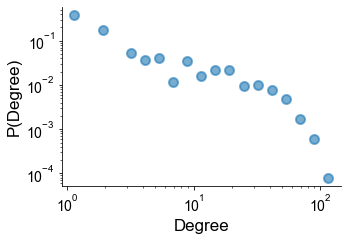

In [17]:
x1, y1 = plot_degree(DGp, n_bins=20)
fig = plt.figure(figsize=(5,3.3))
ax = fig.add_subplot(1, 1, 1)
ax.loglog(x1,y1, 'o', markersize=9, markeredgecolor='tab:blue', markeredgewidth=2, alpha=0.6)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Degree', fontsize=17)
plt.ylabel('P(Degree)', fontsize=17)
# plt.savefig('./../figs/S5B.svg', pad_inches=0.1, bbox_inches='tight')

In [13]:
part = louvain_cluster(DGp, random_state=True, random_s=random_s)
clustergo(part, lib='org.Mm.eg.db')

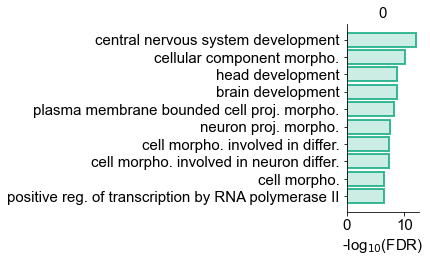

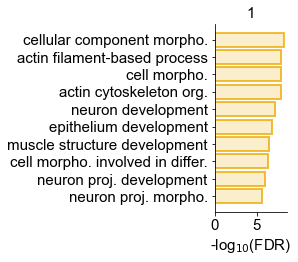

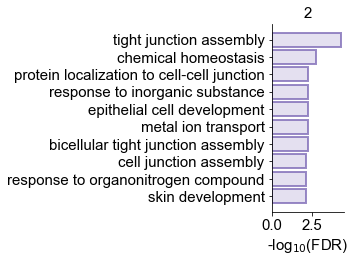

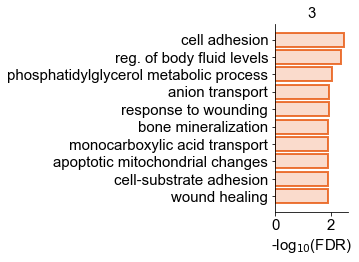

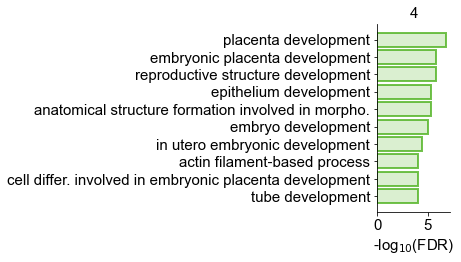

In [19]:
for n in np.unique(list(part.values())):
    go_plot(n)
#     plt.savefig(f'./../../figs/S5C_{n}.svg', pad_inches=0.1, bbox_inches='tight')

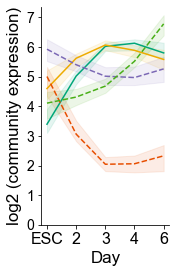

In [72]:
dfmem = pd.DataFrame(part, index=['Community']).T
fig = plt.figure(figsize=((2.3,4)))
ax = fig.add_subplot(1,1,1)
cmap = get_cmap(part, highlight=True, modulelist=list(np.arange(5)), alpha=0.8)
eval_x = np.arange(1.0,6.0)

for n in list(np.arange(5)):
    xs = np.repeat(np.array([np.repeat(np.arange(1.0,6.0),2)]),len(dfmem[dfmem['Community']==n]),axis=0)
    ys = dfexp.loc[dfmem[dfmem['Community']==n].index].to_numpy()[:,10:20]
    smoothed, bottom, top = lowess_with_confidence_bounds(
        xs.flatten(), ys.flatten(), eval_x, lowess_kw={"frac": 0.8, "return_sorted":False})
    if n in [0,1]:
        plt.plot(eval_x,smoothed, color=cmap[n])
    else:
        plt.plot(eval_x,smoothed, color=cmap[n], ls='--')
    plt.fill_between(eval_x, bottom, top, color=cmap[n], alpha=0.1)

plt.ylim(bottom=0)
plt.xlabel('Day', fontsize=17)
plt.ylabel('log2 (community expression)', fontsize=17)
plt.xticks([1,2,3,4,5], ['ESC','2','3','4','6'], fontsize=16)
plt.yticks(fontsize=14)
# plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.savefig('./../../figs/S5C_exp.svg', pad_inches=0.1, bbox_inches='tight')

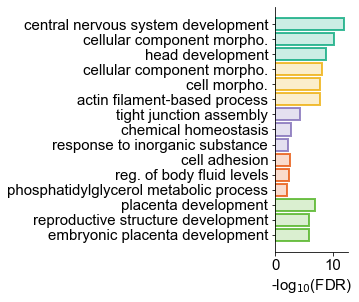

In [17]:
go_group_plot(list(np.arange(5)))
# plt.savefig('./../../figs/S5C_exp_go.svg', pad_inches=0.1, bbox_inches='tight')

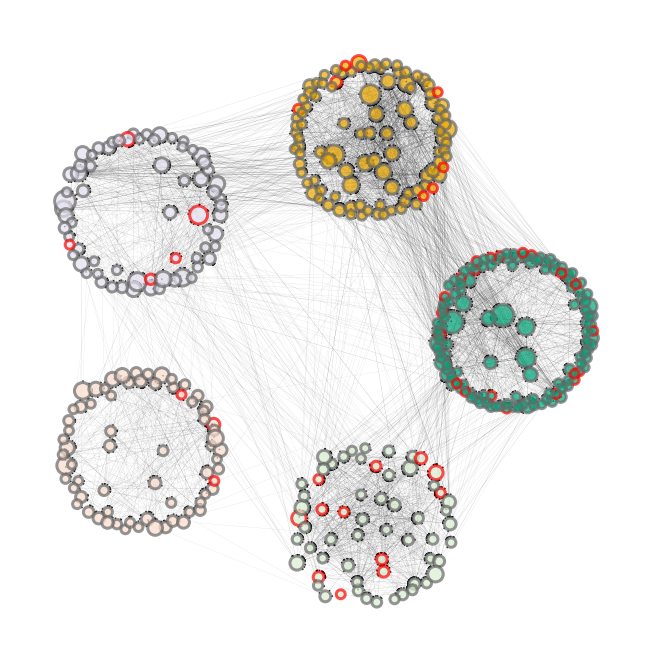

In [84]:
pos = community_layout(DGp, partition=part, scales_c=2.6, scales_n=1.8)
fig, ax = plt.subplots(figsize=(11.5, 12))
edge_colors = highlight_cmap(list(DGp.nodes()),grntfs)

node_size = np.array(list(nx.betweenness_centrality(DGp, weight='weight', seed=random_s).values()))*8000+80
edge_width = np.array(list(nx.get_edge_attributes(DGp, 'weight').values()))
#cmap = get_cmap(part, highlight=False)
cmap = get_cmap(part, highlight=True, modulelist=[0,1], alpha=0.8)
node_color=[cmap[v] for v in list(part.values())]

nodes = nx.draw_networkx_nodes(DGp, pos, node_color=node_color, edgecolors=edge_colors,
                               node_size=node_size, alpha=0.7, linewidths=3)
edges = nx.draw_networkx_edges(DGp, pos, node_size=node_size,
                               width=0.1*edge_width, edge_color='black', arrowsize=5)

ax.set_axis_off()
# plt.savefig('./../../figs/S5C.svg', pad_inches=0.1, bbox_inches='tight')

In [21]:
dffig = pd.DataFrame(zip(list(DGp.nodes()), node_size, edge_colors, list(part.values())), 
columns=['geneid', 'rank', 'istf', 'community'])
dffig[dffig['istf']=='#fc0303'].sort_values(by=['rank'], ascending=False)[:15]

,geneid,rank,istf,community
97,Foxa3,321.717308,#fc0303,2
29,Gcm1,225.209183,#fc0303,1
35,Batf3,207.584849,#fc0303,4
60,Hand1,193.238471,#fc0303,4
155,Snai3,182.127478,#fc0303,2
204,Tbx18,154.669278,#fc0303,3
213,Elf3,124.954822,#fc0303,4
95,Cdx2,118.313768,#fc0303,4
13,Smad3,117.249497,#fc0303,1
124,Ets2,116.994072,#fc0303,4


In [77]:
dffig[dffig['istf']!='#fc0303'].sort_values(by=['rank'], ascending=False)[:3]

,geneid,rank,istf,community
2,Id4,479.484893,#696969,0
1,Ptn,471.992422,#696969,0
214,Cldn6,432.358957,#696969,2


In [18]:
DG = read_directed_grn(f'./../../results/GSE208199/GRN/{treatments[2]}_3_t5.txt')
DGp = remove_edge(DG, 0.411, component='positive')
print(f'edges {len(DGp.edges())}')
print(f'nodes {len(DGp.nodes())}')
print(f'''mean weight {np.sum([w for _, _, w in list(DGp.edges.data('weight'))])/len(DGp.edges())}''')
print(f'mean degree {np.sum(list(dict(DGp.degree()).values()))/len(DGp.nodes())}')

edges 1512
nodes 376
mean weight 0.4940956996305757
mean degree 8.042553191489361


Text(0, 0.5, 'P(Degree)')

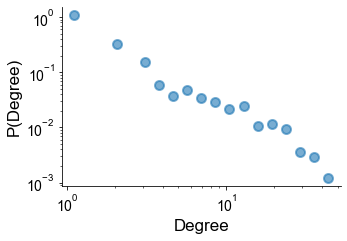

In [37]:
x1, y1 = plot_degree(DGp, n_bins=20)
fig = plt.figure(figsize=(5,3.3))
ax = fig.add_subplot(1, 1, 1)
ax.loglog(x1,y1, 'o', markersize=9, markeredgecolor='tab:blue', markeredgewidth=2, alpha=0.6)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Degree', fontsize=17)
plt.ylabel('P(Degree)', fontsize=17)
# plt.savefig('./../figs/S5C.svg', pad_inches=0.1, bbox_inches='tight')

In [19]:
part = louvain_cluster(DGp, random_state=True, random_s=random_s)
clustergo(part, lib='org.Mm.eg.db')

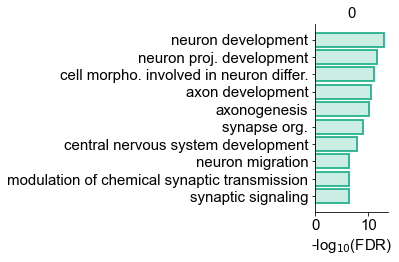

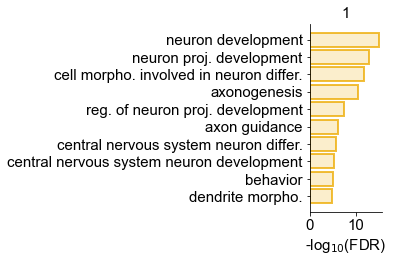

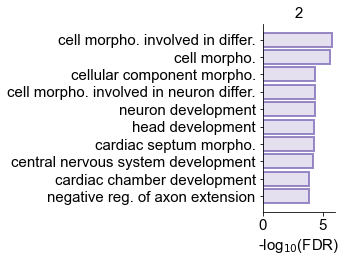

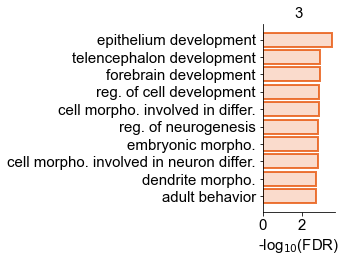

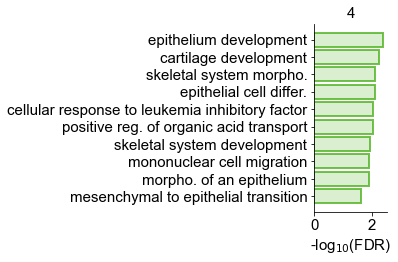

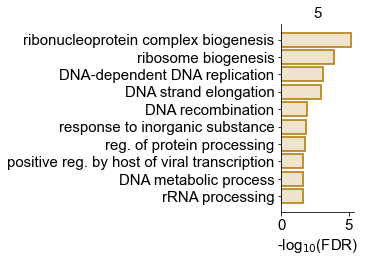

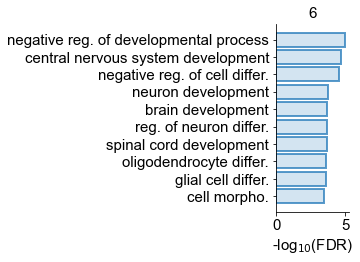

In [24]:
for n in np.unique(list(part.values())):
    go_plot(n)
#     plt.savefig(f'./../../figs/S5D_{n}.svg', pad_inches=0.1, bbox_inches='tight')

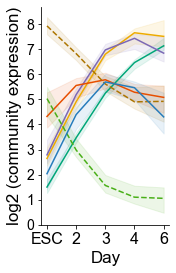

In [76]:
dfmem = pd.DataFrame(part, index=['Community']).T
fig = plt.figure(figsize=((2.3,4)))
ax = fig.add_subplot(1,1,1)
cmap = get_cmap(part, highlight=True, modulelist=list(np.arange(7)), alpha=0.8)
eval_x = np.arange(1.0,6.0)

for n in list(np.arange(7)):
    xs = np.repeat(np.array([np.repeat(np.arange(1.0,6.0),2)]),len(dfmem[dfmem['Community']==n]),axis=0)
    ys = dfexp.loc[dfmem[dfmem['Community']==n].index].to_numpy()[:,20:30]
    smoothed, bottom, top = lowess_with_confidence_bounds(
        xs.flatten(), ys.flatten(), eval_x, lowess_kw={"frac": 0.8, "return_sorted":False})
    if n in [4,5]:
        plt.plot(eval_x,smoothed, color=cmap[n], ls='--')
    else:
        plt.plot(eval_x,smoothed, color=cmap[n])
    plt.fill_between(eval_x, bottom, top, color=cmap[n], alpha=0.1)

plt.ylim(bottom=0)
plt.xlabel('Day', fontsize=17)
plt.ylabel('log2 (community expression)', fontsize=17)
plt.xticks([1,2,3,4,5], ['ESC','2','3','4','6'], fontsize=16)
plt.yticks(fontsize=14)
# plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.savefig('./../../figs/S5D_exp.svg', pad_inches=0.1, bbox_inches='tight')

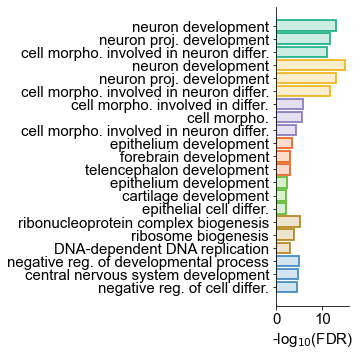

In [26]:
go_group_plot(list(np.arange(7)))
# plt.savefig('./../../figs/S5D_exp_go.svg', pad_inches=0.1, bbox_inches='tight')

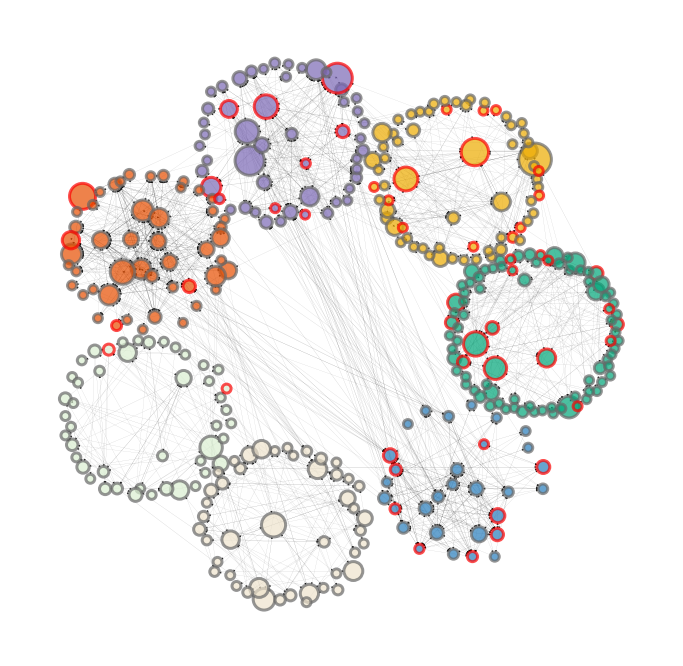

In [25]:
part = louvain_cluster(DGp, random_state=True, random_s=random_s)
pos = community_layout(DGp, partition=part, scales_c=2.4, scales_n=1.8)
fig, ax = plt.subplots(figsize=(12, 12))
edge_colors = highlight_cmap(list(DGp.nodes()),grntfs)

node_size = np.array(list(nx.betweenness_centrality(DGp, weight='weight', seed=random_s).values()))*8000+80
edge_width = np.array(list(nx.get_edge_attributes(DGp, 'weight').values()))
#cmap = get_cmap(part, highlight=False)
cmap = get_cmap(part, highlight=True, modulelist=[0,1,2,3,6], alpha=0.8)
node_color=[cmap[v] for v in list(part.values())]

nodes = nx.draw_networkx_nodes(DGp, pos, node_color=node_color, edgecolors=edge_colors,
                               node_size=node_size, alpha=0.7, linewidths=3)
edges = nx.draw_networkx_edges(DGp, pos, node_size=node_size,
                               width=0.1*edge_width, edge_color='black', arrowsize=5)

ax.set_axis_off()
plt.savefig('./../../figs/S5D.svg', pad_inches=0.1, bbox_inches='tight')

In [26]:
dffig = pd.DataFrame(zip(list(DGp.nodes()), node_size, edge_colors, list(part.values())), 
columns=['geneid', 'rank', 'istf', 'community'])
dffig[dffig['istf']=='#fc0303'].sort_values(by=['rank'], ascending=False)[:15]

,geneid,rank,istf,community
77,Pax9,887.472371,#fc0303,2
16,Lhx9,746.352941,#fc0303,1
20,Lef1,676.705882,#fc0303,3
102,Lhx1,589.718360,#fc0303,0
24,Esrrg,565.875223,#fc0303,1
46,Bhlhe23,555.493761,#fc0303,2
96,Skor1,502.901961,#fc0303,0
42,Nr6a1,379.122995,#fc0303,2
137,Sall3,324.135472,#fc0303,0
99,Pou3f1,300.121212,#fc0303,3


In [42]:
dffig[dffig['istf']!='#fc0303'].sort_values(by=['rank'], ascending=False)[:3]

,geneid,rank,istf,community
121,Rprm,1064.356506,#696969,1
41,Cartpt,857.183601,#696969,2
9,Eif4e3,600.213904,#696969,3


In [27]:
DG = read_directed_grn(f'./../../results/GSE208199/GRN/{treatments[3]}_3_t5.txt')
DGp = remove_edge(DG, 0.36, component='positive')
print(f'edges {len(DGp.edges())}')
print(f'nodes {len(DGp.nodes())}')
print(f'''mean weight {np.sum([w for _, _, w in list(DGp.edges.data('weight'))])/len(DGp.edges())}''')
print(f'mean degree {np.sum(list(dict(DGp.degree()).values()))/len(DGp.nodes())}')

edges 1528
nodes 290
mean weight 0.4564541098012127
mean degree 10.537931034482758


Text(0, 0.5, 'P(Degree)')

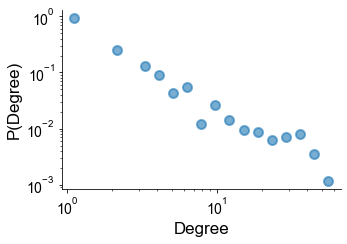

In [58]:
x1, y1 = plot_degree(DGp, n_bins=20)
fig = plt.figure(figsize=(5,3.3))
ax = fig.add_subplot(1, 1, 1)
ax.loglog(x1,y1, 'o', markersize=9, markeredgecolor='tab:blue', markeredgewidth=2, alpha=0.6)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Degree', fontsize=17)
plt.ylabel('P(Degree)', fontsize=17)
# plt.savefig('./../figs/S5D.svg', pad_inches=0.1, bbox_inches='tight')

In [28]:
part = louvain_cluster(DGp, random_state=True, random_s=random_s)
clustergo(part, lib='org.Mm.eg.db')

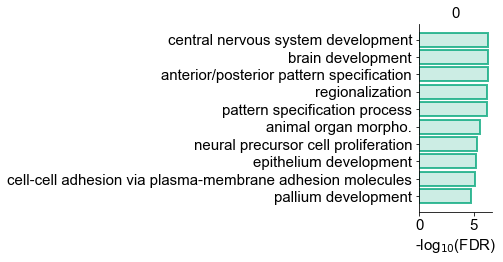

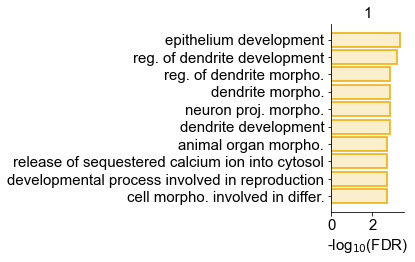

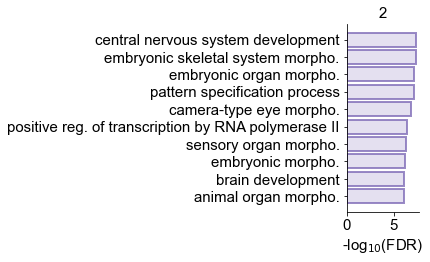

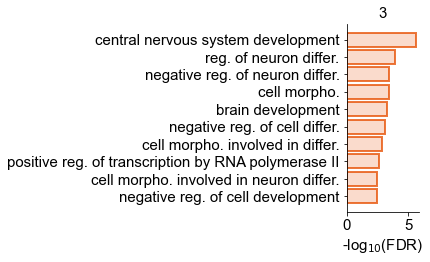

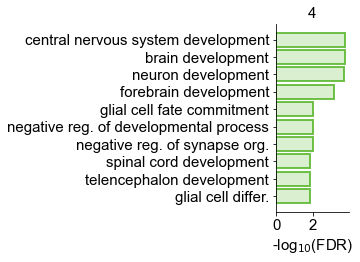

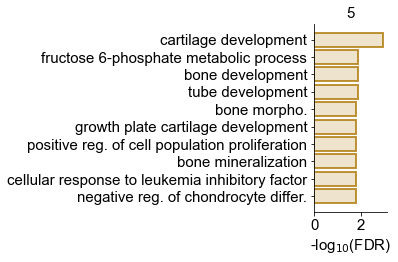

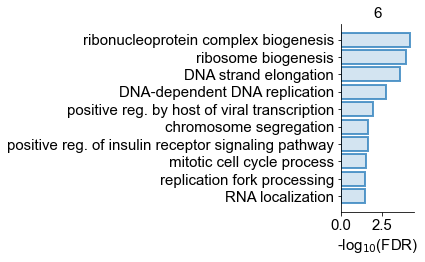

In [55]:
for n in np.unique(list(part.values())):
    go_plot(n)
#     plt.savefig(f'./../../figs/S5E_{n}.svg', pad_inches=0.1, bbox_inches='tight')

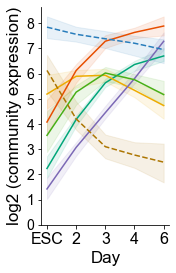

In [79]:
dfmem = pd.DataFrame(part, index=['Community']).T
fig = plt.figure(figsize=((2.3,4)))
ax = fig.add_subplot(1,1,1)
cmap = get_cmap(part, highlight=True, modulelist=list(np.arange(7)), alpha=0.8)
eval_x = np.arange(1.0,6.0)

for n in list(np.arange(7)):
    xs = np.repeat(np.array([np.repeat(np.arange(1.0,6.0),2)]),len(dfmem[dfmem['Community']==n]),axis=0)
    ys = dfexp.loc[dfmem[dfmem['Community']==n].index].to_numpy()[:,30:]
    smoothed, bottom, top = lowess_with_confidence_bounds(
        xs.flatten(), ys.flatten(), eval_x, lowess_kw={"frac": 0.8, "return_sorted":False})
    if n in [5,6]:
        plt.plot(eval_x,smoothed, color=cmap[n], ls='--')
    else:
        plt.plot(eval_x,smoothed, color=cmap[n])
    plt.fill_between(eval_x, bottom, top, color=cmap[n], alpha=0.1)

plt.ylim(bottom=0)
plt.xlabel('Day', fontsize=17)
plt.ylabel('log2 (community expression)', fontsize=17)
plt.xticks([1,2,3,4,5], ['ESC','2','3','4','6'], fontsize=16)
plt.yticks(fontsize=14)
# plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.savefig('./../../figs/S5E_exp.svg', pad_inches=0.1, bbox_inches='tight')

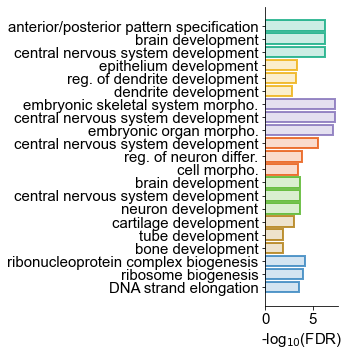

In [30]:
go_group_plot(list(np.arange(7)))
# plt.savefig('./../../figs/S5E_exp_go.svg', pad_inches=0.1, bbox_inches='tight')

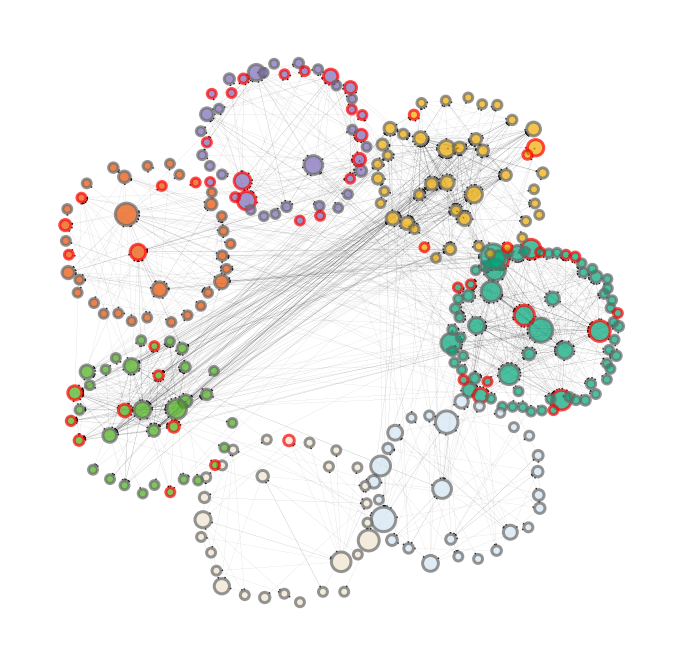

In [88]:
part = louvain_cluster(DGp, random_state=True, random_s=random_s)
pos = community_layout(DGp, partition=part, scales_c=2.4, scales_n=1.8)
fig, ax = plt.subplots(figsize=(12, 12))
edge_colors = highlight_cmap(list(DGp.nodes()),grntfs)

node_size = np.array(list(nx.betweenness_centrality(DGp, weight='weight', seed=random_s).values()))*8000+80
edge_width = np.array(list(nx.get_edge_attributes(DGp, 'weight').values()))
#cmap = get_cmap(part, highlight=False)
cmap = get_cmap(part, highlight=True, modulelist=[0,1,2,3,4], alpha=0.8)
node_color=[cmap[v] for v in list(part.values())]

nodes = nx.draw_networkx_nodes(DGp, pos, node_color=node_color, edgecolors=edge_colors,
                               node_size=node_size, alpha=0.7, linewidths=3)
edges = nx.draw_networkx_edges(DGp, pos, node_size=node_size,
                               width=0.1*edge_width, edge_color='black', arrowsize=5)

ax.set_axis_off()
# plt.savefig('./../../figs/S5E.svg', pad_inches=0.1, bbox_inches='tight')

In [58]:
dffig = pd.DataFrame(zip(list(DGp.nodes()), node_size, edge_colors, list(part.values())), 
columns=['geneid', 'rank', 'istf', 'community'])
dffig[dffig['istf']=='#fc0303'].sort_values(by=['rank'], ascending=False)[:15]

,geneid,rank,istf,community
18,Pax6,431.787774,#fc0303,0
33,Nr2f1,405.259516,#fc0303,0
44,Pou3f3,387.766244,#fc0303,0
21,Pou3f2,376.232218,#fc0303,0
22,Hoxb2,338.169935,#fc0303,0
90,Hoxb3,335.478662,#fc0303,2
89,Npas3,274.059977,#fc0303,2
74,Otx2,267.908497,#fc0303,1
54,Ebf2,245.128797,#fc0303,3
138,Zfp113,213.506344,#fc0303,0


In [63]:
dffig[dffig['istf']!='#fc0303'].sort_values(by=['rank'], ascending=False)[:3]

,geneid,rank,istf,community
78,Vxn,631.326413,#696969,0
97,Nucks1,597.781622,#696969,6
29,Phldb2,577.885429,#696969,0
